In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr

In [58]:
df = pd.read_csv('sga_24_25_adv.csv')

# removing last row as it is an aggergate row of stats
df = df[:-1]

In [59]:
df["Result"] = df["Result"].apply(lambda x: 1 if x.startswith('W') else 0)

def convert_to_seconds(mp_str):
    try:
        if pd.isna(mp_str):
            return np.nan
        parts = mp_str.split(':')
        if len(parts) != 3:
            return np.nan  # Or raise error
        minutes, seconds, milliseconds = map(int, parts)
        total_seconds = minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    except:
        return np.nan

df['MP'] = df['MP'].apply(convert_to_seconds).astype(float)


In [60]:
filtered_df = df.dropna(subset=['GmSc'])

In [61]:
filtered_df

,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,GmSc,BPM
0,1.0,387.0,1.0,24/10/2024,OKC,@,DEN,1,*,2172.0,...,8.8,37.3,2.6,6.6,7.1,31.6,115.0,86.0,25.0,17.8
1,2.0,388.0,2.0,26/10/2024,OKC,@,CHI,1,*,1770.0,...,11.3,10.7,5.7,0.0,4.3,30.2,105.0,77.0,19.1,11.4
2,3.0,389.0,3.0,27/10/2024,OKC,NaN,ATL,1,*,2161.0,...,15.6,40.9,3.9,6.7,3.4,35.2,140.0,94.0,35.5,18.2
3,4.0,390.0,4.0,30/10/2024,OKC,NaN,SAS,1,*,1655.0,...,7.6,30.2,1.8,0.0,4.6,35.7,92.0,100.0,11.1,-3.4
4,5.0,391.0,5.0,1/11/2024,OKC,@,POR,1,*,1703.0,...,14.6,33.0,1.7,0.0,12.7,34.4,141.0,116.0,26.1,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,72.0,458.0,75.0,31/03/2025,OKC,NaN,CHI,1,*,1636.0,...,0.0,58.4,0.0,7.5,10.5,27.5,162.0,112.0,28.6,17.3
75,73.0,459.0,76.0,2/04/2025,OKC,NaN,DET,1,*,2123.0,...,9.1,14.3,4.0,4.8,3.1,36.6,119.0,98.0,26.1,11.0
76,74.0,460.0,77.0,4/04/2025,OKC,@,HOU,0,*,2102.0,...,6.8,37.4,4.1,0.0,11.6,32.1,101.0,121.0,16.6,3.0
77,75.0,461.0,78.0,6/04/2025,OKC,NaN,LAL,0,*,1826.0,...,6.1,70.7,1.7,3.6,4.2,37.0,123.0,132.0,22.2,14.6


In [ ]:
column_names = [col for col in df.columns]
skipped_cols = column_names[:9]

In [ ]:
results_fillna = []
results_dropna = []


for col in column_names:
    # 1. Fill NaN with 0

    if col in skipped_cols:
        continue

    try:
        r_fill, p_fill = pointbiserialr(df['Result'], df[col].fillna(0))
        results_fillna.append((col, r_fill, p_fill))
    except Exception as e:
        results_fillna.append((col, None, None))
        print(f"[fillna] Could not calculate for {col}: {e}")

    # 2. Drop NaN values in current column
    try:
        filtered_df = df.dropna(subset=[col])
        r_drop, p_drop = pointbiserialr(filtered_df['Result'], filtered_df[col])
        results_dropna.append((col, r_drop, p_drop))
    except Exception as e:
        results_dropna.append((col, None, None))
        print(f"[dropna] Could not calculate for {col}: {e}")

# Display results
print("\n--- Correlation with 'Result' (NaNs filled with 0) ---")
for col, r, p in results_fillna:
    print(f"{col:>5}: r_pb = {r:.4f} | p = {p:.4g}" if r is not None else f"{col:>5}: Calculation failed")

print("\n--- Correlation with 'Result' (Rows with NaNs dropped) ---")
for col, r, p in results_dropna:
    print(f"{col:>5}: r_pb = {r:.4f} | p = {p:.4g}" if r is not None else f"{col:>5}: Calculation failed")

In [ ]:
r, p = pointbiserialr(df['Result'], df['GmSc'].fillna(0))
print("r_pb:", r)
print("p-value:", p)

r, p = pointbiserialr(filtered_df['Result'], filtered_df['GmSc'])
print("dropped r_pb:", r)
print("dropped p-value:", p)

In [ ]:
r, p = pointbiserialr(df['Result'], df['FG'].fillna(0))
print("r_pb:", r)
print("p-value:", p)

In [ ]:
def convert_to_seconds(mp_str):
    try:
        if pd.isna(mp_str):
            return np.nan
        parts = mp_str.split(':')
        if len(parts) != 3:
            return np.nan  # Or raise error
        minutes, seconds, milliseconds = map(int, parts)
        total_seconds = minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    except:
        return np.nan

df['MP'] = df['MP'].apply(convert_to_seconds).astype(float)

r, p = pointbiserialr(df['Result'], df['MP'].fillna(0))
print("r_pb:", r)
print("p-value:", p)

In [ ]:
r, p = pointbiserialr(df['Result'], df['FGA'].fillna(0))
print("r_pb:", r)
print("p-value:", p)

In [ ]:
r, p = pointbiserialr(df['Result'], df['PTS'].fillna(0))
print("r_pb:", r)
print("p-value:", p)

In [ ]:
r, p = pointbiserialr(df['Result'], df['+/-'].fillna(0))
print("r_pb:", r)
print("p-value:", p)

d:\projects\basketball\corr\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


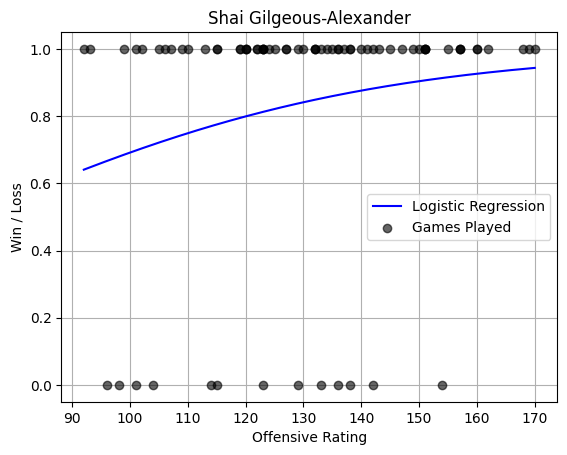

In [62]:
# x = df[['+/-']].fillna(0)
x = filtered_df[['ORtg']]
y = filtered_df['Result']

model = LogisticRegression()
model.fit(x, y)

# Generate smooth curve data
x_vals = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
# x_vals = np.linspace(-100, 100, 3000).reshape(-1, 1)
# Predict probabilities for the logistic curve
y_probs = model.predict_proba(x_vals)[:, 1]  # probability of class 1

# Plot the logistic regression curve
plt.plot(x_vals, y_probs, color='blue', label='Logistic Regression')

# Plot the real data points (scatter)
# Use y values as dots at 0 or 1, jitter slightly to see overlap
plt.scatter(x, y, color='black', zorder=20, label='Games Played', alpha=0.6)

plt.xlabel('Offensive Rating')      # change to your feature name
plt.ylabel('Win / Loss')
plt.title('Shai Gilgeous-Alexander')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
x

,MP
0,2172.0
1,1770.0
2,2161.0
3,1655.0
4,1703.0
...,...
74,1636.0
75,2123.0
76,2102.0
77,1826.0


In [16]:
y

0     1
1     1
2     1
3     1
4     1
     ..
74    1
75    1
76    0
77    0
78    1
Name: Result, Length: 76, dtype: int64